# DAZ

This script does the following:

1. Creates spaCy docs from a list of text files.
2. Converts the tokens to lower case and filters them to remove digits, punctuation, and whitespace.
3. Tests that the loader is working properly.
4. Cuts texts.
5. Store data in a document term matrix.
6. Generates a dendogram from the dtm.

## Configuration

Configure a list of file paths, the labels you wish to use for each document, and the language model you wish to use to parse the texts.

Note that converting long texts to spaCy docs can take a long time.

In [1]:
# Replace with your own data
data = [
    r"C:\Users\jack\OneDrive\Documents\School\summer22\LexosRepo\lexos\tests\test_data\txt\Dan.txt",
    r"C:\Users\jack\OneDrive\Documents\School\summer22\LexosRepo\lexos\tests\test_data\txt\Azarias.txt"
    #r"C:\Users\jack\OneDrive\Documents\School\summer22\LexosRepo\lexos\tests\test_data\txt\DTMtest.txt"
]

model = "en_core_web_sm"

## Import Lexos API

In [2]:
# Set local import path
import os
import sys
LEXOS_PATH = "lexos"
if "NOTEBOOK_INITIATED_FLAG" not in globals():
    NOTEBOOK_INITIATED_FLAG = True
    try:
        module_path = os.path.join(os.path.dirname(__file__), os.pardir)
    except:
        module_path = os.path.abspath(os.path.join(LEXOS_PATH))
        %cd lexos
        %pwd
    if module_path not in sys.path:
        sys.path.append(module_path)
        
# Import Lexos API modules
from lexos.io.basic import Loader
from lexos import tokenizer
from lexos.dtm import DTM
from lexos.cutter import Ginsu
try:
    from lexos.cluster.dendrogram import Dendrogram
except ImportError:
    print("Dendogram not imported.")

C:\Users\jack\OneDrive\Documents\School\summer22\LexosRepo\lexos\lexos


## Load Texts and Convert to spaCy Docs

In [3]:
# Create the loader and load the data
loader = Loader()
loader.load(data[0])

# Make the docs -- currently takes a long time with full novels
doc1 = tokenizer.make_docs(loader.texts, model=model)

loader = Loader()
#loader.load(data)
loader.load(data[1])
doc2 = tokenizer.make_doc(loader.texts[0], model=model)

In [4]:
print (doc2)

 Him &t;a Azarias inge&t;oncum hleo&t;rede halig &t;urh hatne lig  dreag d&ae;dum georn  dryhten herede  wis in weorcum  ond &t;as word acw&ae;&d;: Meotud allwihta  &t;u eart meahtum swi&d; ni&t;as to nerganne. 
 Is &t;in noma m&ae;re  wlitig ond wuldorf&ae;st ofer wer&t;eode. 
 Sindon &t;ine domas on d&ae;da gehwam so&d;e geswi&d;de ond gesigef&ae;ste  eac <corr>&t;ine</corr> willan in woruldspedum ryhte mid r&ae;de. 
 Rodera waldend  geoca us georne  g&ae;sta scyppend  ond &t;urh hyldo help  halig dryhten  nu we &t;ec for &t;earfum ond for &t;reanydum ond fore ea&d;medum arena bidda&t;  lege bilegde. 
 We &t;&ae;s lifgende worhton in worulde  eac &t;on wom dydon yldran usse  in oferhygdum &t;in bibodu br&ae;con burgsittende  had oferhogedon halgan lifes. 
 Wurdon we towrecene geond widne grund  heapum tohworfne  hylda lease; w&ae;s ure lif geond londa fela fracu&d; ond gefr&ae;ge foldbuendum. 
 Nu &t;u usic bewr&ae;ce in &t;as wyrrestan eor&d;cyninges &ae;htgewealda  in h&ae;ft heoro

In [5]:
from lexos.dtm import DTM
label = ["test"]
dtm = DTM([doc2], label)
dtm.build()

ModuleNotFoundError: No module named 'cytoolz'

In [ ]:
print ("Data Table: \n")
df = dtm.get_table()
print (df)

print ("\nMost Frequent Terms: \n")
most_frequent = dtm.most_frequent(max_n_terms=25)
print (most_frequent)

In [ ]:
from lexos.dtm import get_doc_term_counts
df = get_doc_term_counts([doc2], as_df=True)
df

## Ensure Loader is working correctly

In [ ]:
for i, doc in enumerate(doc1):
    print(doc.text[0:50])

print ("\n")

print(doc2.text[0:50])

## Cut texts

In [ ]:
from lexos.cutter import Ginsu
cutter = Ginsu()

doc1split = cutter.splitn(doc1, n=10)
doc1split = doc1split[0]

docs = doc1split
docs.append(doc2)

print (len(docs))

In [19]:
for i, adoc in enumerate(docs):
    print(i,"-------------------------------------------\n")
    print(adoc.text[0:150])
    

0 -------------------------------------------

 Gefr&ae;gn ic Hebreos eadge lifgean in Hierusalem  goldhord d&ae;lan  cyningdom habban  swa him gecynde w&ae;s  si&d;&d;an &t;urh metodes m&ae;gen on
1 -------------------------------------------

sine gerefan geond Israela earme lafe  hwilc &t;&ae;re geogo&d;e gleawost w&ae;re boca bebodes  &t;e &t;&ae;r brungen w&ae;s. 
 Wolde &t;&ae;t &t;a c
2 -------------------------------------------

reccan sinum frean  s&ae;gde him wislice wereda gesceafte  &t;&ae;tte sona ongeat swi&d;mod cyning ord and ende &t;&ae;s &t;e him ywed w&ae;s. 
 &D;a
3 -------------------------------------------

t;eah &t;e hie swa grome nydde in f&ae;&d;m fyres lige  hw&ae;&d;ere heora feorh generede mihtig metodes weard. 
 Swa &t;&ae;t m&ae;nige gefrunon  ha
4 -------------------------------------------

; is user lif geond landa fela fraco&d; and gefr&ae;ge folca manegum  &t;a <corr>usic</corr> bewr&ae;con to &t;&ae;s wyrrestan eor&d;cyninga &ae;hta g
5 -----------

## Initiate DTM

In [20]:
from lexos.dtm import DTM
labels = ["Dan1", "Dan2", "Dan3", "Dan4", "Dan5", "Dan6", "Dan7", "Dan8", "Dan9", "Dan10", "Az"]
dtm = DTM(docs, labels)

## Examine DTM

In [21]:
print ("Data Table: \n")
df = dtm.get_table()
print (df)

print ("\nMost Frequent Terms: \n")
most_frequent = dtm.most_frequent(max_n_terms=25)
print (most_frequent)

Data Table: 

          terms  Dan1  Dan2  Dan3  Dan4  Dan5  Dan6  Dan7  Dan8  Dan9  Dan10  \
0         \r\n     22    21    18    27    20    27    19    22    22     20   
1                  69    62    68    50    66    72    60    68    78     64   
2             &    63    76    84    64    71    60    69    73    58     77   
3             (     0     1     0     0     0     0     0     0     0      0   
4             )     0     1     0     0     0     0     0     0     0      0   
...         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   
2165        ymb     0     0     0     2     0     0     0     2     0      0   
2166  ymb</corr     0     0     0     0     0     0     0     0     0      1   
2167       ymbe     0     0     0     0     0     0     0     1     0      0   
2168       yrre     0     0     2     0     0     0     0     1     0      0   
2169       ywed     0     0     1     0     0     0     0     0     0      0   

       Az  
0      52  
1

C:\Users\jack\OneDrive\Documents\School\summer22\LexosRepo\lexos\lexos\dtm\__init__.py:100: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  tmp["sum"] = df.sum(axis=1)


## Create Dendogram

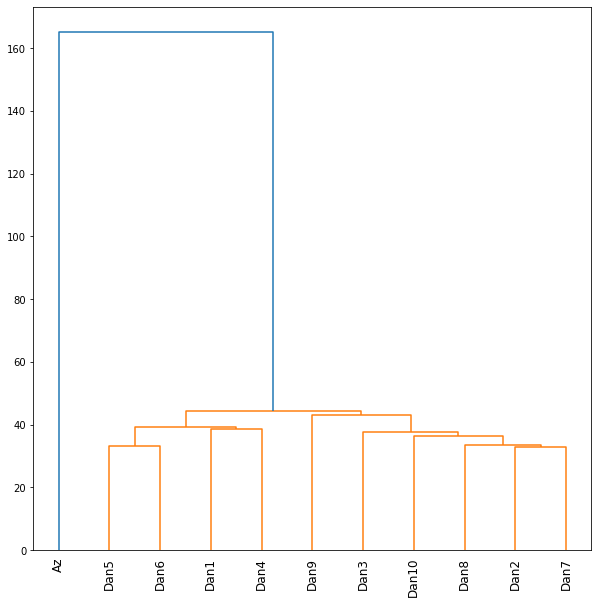

In [22]:
dendrogram = Dendrogram(dtm, show=True)